In [ ]:
__author__ = "Alireza Sadabadi"
__copyright__ = "Copyright (c) 2024 Alireza Sadabadi. All rights reserved."
__credits__ = ["Alireza Sadabadi"]
__license__ = "Apache"
__version__ = "2.0"
__maintainer__ = "Alireza Sadabadi"
__email__ = "alirezasadabady@gmail.com"
__status__ = "Test"
__doc__ = "you can see the tutorials in https://youtube.com/@alirezasadabadi?si=d8o7LK_Ai1Hf68is"

In [30]:
import pandas as pd
df = pd.read_csv("EURUSDH4.csv")
df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
9995,2025-04-24 04:00:00,1.13448,1.13569,1.13317,1.13387,12077,2,0
9996,2025-04-24 08:00:00,1.13386,1.13924,1.13303,1.13800,18491,8,0
9997,2025-04-24 12:00:00,1.13797,1.13942,1.13573,1.13759,18639,8,0
9998,2025-04-24 16:00:00,1.13763,1.13868,1.13472,1.13795,20270,8,0
9999,2025-04-24 20:00:00,1.13794,1.13852,1.13649,1.13726,3433,8,0


In [31]:
import numpy as np
import pandas_ta as pdta
df['ATR'] = pdta.atr(df['high'],df['low'],df['close'],length=20)
df['RSI'] = pdta.rsi(df['close'])
df['MA40'] = pdta.sma(df['close'],length=40)
df['MA80'] = pdta.sma(df['close'],length=80)
df['MA160'] = pdta.sma(df['close'],length=160)
df['Average'] = pdta.midprice(df['high'],df['low'])


In [32]:
from scipy.stats import linregress
def GetSlope(array):
    y = np.array(array)
    x = np.arange(len(y))
    response = linregress(x,y)
    return response.slope

In [33]:
    backRolling = 7
    
    df['ATRSlope'] = df['ATR'].rolling(window=backRolling).apply(GetSlope, raw=True)
    df['RSISlope'] = df['RSI'].rolling(window=backRolling).apply(GetSlope, raw=True)
    df['MA40Slope'] = df['MA40'].rolling(window=backRolling).apply(GetSlope, raw=True)
    df['MA80Slope'] = df['MA80'].rolling(window=backRolling).apply(GetSlope, raw=True)
    df['MA160Slope'] = df['MA160'].rolling(window=backRolling).apply(GetSlope, raw=True)
    df['AverageSlope'] = df['Average'].rolling(window=backRolling).apply(GetSlope, raw=True)

In [34]:
df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume,ATR,RSI,MA40,MA80,MA160,Average,ATRSlope,RSISlope,MA40Slope,MA80Slope,MA160Slope,AverageSlope
9995,2025-04-24 04:00:00,1.13448,1.13569,1.13317,1.13387,12077,2,0,0.005202,40.807941,1.140115,1.127151,1.106099,1.133220,-0.000024,-1.326979,0.000036,0.000423,0.000271,-0.000990
9996,2025-04-24 08:00:00,1.13386,1.13924,1.13303,1.13800,18491,8,0,0.005253,47.488353,1.140381,1.127668,1.106368,1.136135,-0.000032,-0.480187,0.000036,0.000437,0.000263,-0.001057
9997,2025-04-24 12:00:00,1.13797,1.13942,1.13573,1.13759,18639,8,0,0.005175,46.922196,1.140620,1.128157,1.106639,1.136225,-0.000048,0.747506,0.000070,0.000457,0.000261,-0.000717
9998,2025-04-24 16:00:00,1.13763,1.13868,1.13472,1.13795,20270,8,0,0.005114,47.513890,1.140778,1.128642,1.106915,1.137070,-0.000065,1.934348,0.000118,0.000474,0.000264,-0.000002
9999,2025-04-24 20:00:00,1.13794,1.13852,1.13649,1.13726,3433,8,0,0.004960,46.445189,1.140845,1.129141,1.107191,1.136700,-0.000067,1.777390,0.000155,0.000490,0.000268,0.000489


In [35]:
tp = 100*1e-4
sl = tp/2 

def Target(numberOfNextCandles, df):
    open = list(df['open'])
    high = list(df['high'])
    low = list(df['low'])
    dfLength = len(df)
    trend = [None] * dfLength
    
    # cc = current candle
    for cc in range (0,dfLength-numberOfNextCandles-2):
        # VOL = value open low
        # VOH = value open high
        VOL = 0
        VOH = 0
        for i in range(1,numberOfNextCandles+2):
            #o_l = open - low
            #o_h = open - high
            o_l = open[cc+1]-low[cc+i]
            o_h = open[cc+1]-high[cc+i]
            VOL = max(o_l, VOL)
            VOH = min(o_h, VOH)

            if ((-VOL <= -tp) and (-VOH < sl)):
                trend[cc] = 1 # downtrend
                break
            if ((VOL > -sl) and (-VOH >= tp)):
                trend[cc] = 2 # uptrend
                break
            else:
                trend[cc] = 0 # range
            
    return trend

In [36]:
df['Target'] = Target(15, df)
df.value_counts('Target')

Target
0.0    6519
2.0    1929
1.0    1535
Name: count, dtype: int64

In [37]:
df_model = df[['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope', 'Target']] 
df_model = df_model.dropna()

attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["Target"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

# Target in percentage
print(df_model['Target'].value_counts()*100/df_model['Target'].count())

# Random Model
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy test in Random model: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 65.06%
Accuracy test: 65.73%
Target
0.0    65.196578
2.0    19.342025
1.0    15.461397
Name: count, dtype: float64
Accuracy test in Random model: 33.10%


In [41]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)

print("-------XGBOOST-------")
print("Accuracy train: {:.2%}".format(accuracy_train))
print("Accuracy test: {:.2%}".format(accuracy_test))

-------XGBOOST-------
Accuracy train: 99.24%
Accuracy test: 86.20%


In [42]:
#sequential sampling
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, pred_train)
accurace_test = accuracy_score(y_test, pred_test)

print("Accuracy train: {:.2%}".format(accuracy_train))
print("Accuracy test: {:.2%}".format(accurace_test))

Accuracy train: 99.30%
Accuracy test: 55.80%


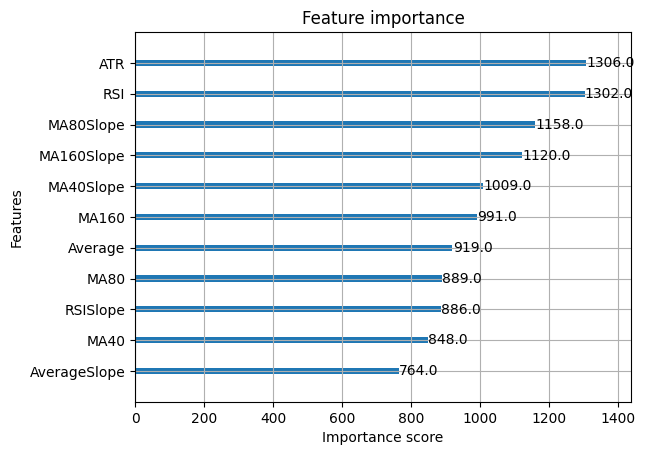

In [43]:
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(model)
pyplot.show()

In [44]:
#https://joblib.readthedocs.io/en/stable/
import joblib

# save the model to disk
filename = 'Model-XGBOOST.ml'
# more info: https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html
joblib.dump(model, filename)

['Model-XGBOOST.ml']

In [ ]:
#load the model from disk
loadedModel = joblib.load('Model-XGBOOST.ml')

In [ ]:
plot_importance(loadedModel)
pyplot.show()